 **Linear Algebra Method of  Regression**

Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Data

In [53]:
X = np.linspace(0, 1, 100).reshape(-1, 1)
sin_x = np.sin(X).reshape(-1, 1)
exp_x = np.exp(X).reshape(-1, 1)
X_sin = np.column_stack([X**i for i in range(6)])
X_exp = np.column_stack([X**i for i in range(6)])
X_combined = np.concatenate([X_sin, X_exp], axis=1)

y = X * sin_x + exp_x

Linear Regression

In [54]:
# Linear regression
reg_param = 1e-5
coeff = np.dot(np.linalg.inv(np.dot(X_combined.T, X_combined) + reg_param * np.eye(12)), np.dot(X_combined.T, y))
print("Coefficients for sin(x) up to 5th order:", coeff[:6])  
print("Coefficients for exp(x) up to 5th order:", coeff[6:])  


Coefficients for sin(x) up to 5th order: [[ 0.49996523]
 [ 0.50091473]
 [ 0.7438943 ]
 [ 0.10077021]
 [-0.08727518]
 [ 0.02160328]]
Coefficients for exp(x) up to 5th order: [[ 0.49996524]
 [ 0.50091473]
 [ 0.7438943 ]
 [ 0.10077021]
 [-0.08727517]
 [ 0.02160328]]


Predictions

In [8]:
# Predicted values
y_pred = np.dot(X_combined, coeff)


Visualization

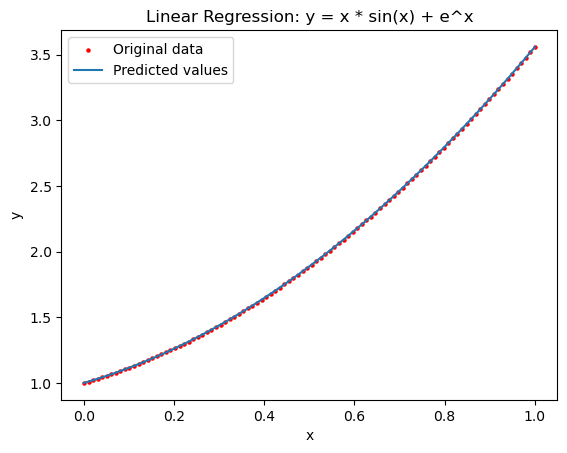

In [13]:
plt.figure()
plt.scatter(X, y, s=5, color='red', label='Original data')
plt.plot(X, y_pred, label='Predicted values')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression: y = x * sin(x) + e^x')
plt.legend()
plt.show()

Error

In [10]:
rms_error = np.sqrt(np.mean((y - y_pred)**2))
print("Root Mean Square (RMS) Error:", rms_error)

Root Mean Square (RMS) Error: 1.3955257923588243e-05


**Iterative Method of Linear Regression**

Coefficients using iterative linear regression: [-0.05827289  0.02172446  0.9146984   1.80096378  0.0320132   0.01498205
  1.69491296  0.56580029]
Coefficients using linear algebra linear regression method: [[  4133.       ]
 [ 40099.       ]
 [  2080.125    ]
 [ -5347.875    ]
 [   228.4140625]
 [   307.359375 ]
 [-35969.       ]
 [ -4131.25     ]]


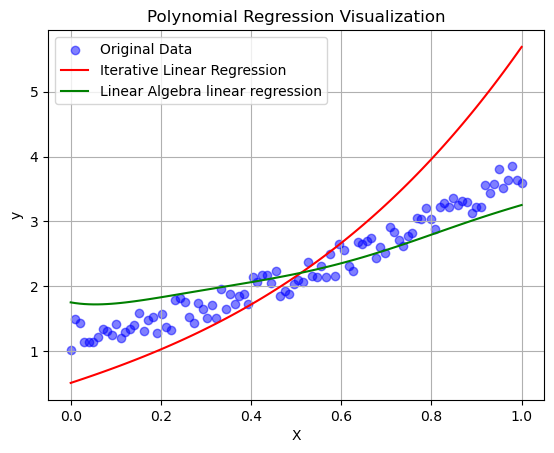

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# data within the range (0, 1) for x
X = np.linspace(0, 1, 100).reshape(-1, 1)

#  polynomial features up to the 5th order
X_poly = np.column_stack([X**i for i in range(6)])  # Polynomial features up to the 5th order

#  sin(x) and e^x terms
sin_x = np.sin(X).reshape(-1, 1)
exp_x = np.exp(X).reshape(-1, 1)

# Combining polynomial features with sin(x) and e^x terms
X_combined = np.concatenate([X_poly, sin_x, exp_x], axis=1)


y_true = X * sin_x + exp_x

#  noise 
y = y_true + np.random.rand(100, 1) * 0.5

# Hyperparameters 
learning_rate = 0.001
num_iterations = 1000

# Initialize coefficients randomly
np.random.seed(42) 
coefficients_iterative = np.random.randn(8)  # 6 coefficients for polynomial features, 1 for sin(x), and 1 for e^x

# Gradient descent loop
for _ in range(num_iterations):
    y_predicted = np.dot(X_combined, coefficients_iterative)
    error = y - y_predicted
    gradient = 2 * np.dot(X_combined.T, error) / len(X_combined)
    coefficients_iterative += learning_rate * np.mean(gradient, axis=1)


# Coefficients using linear algebra (OLS)
coefficients_linalglr = np.dot(np.linalg.inv(np.dot(X_combined.T, X_combined)), np.dot(X_combined.T, y))

# Printing coefficients
print("Coefficients using iterative linear regression:", coefficients_iterative)
print("Coefficients using linear algebra linear regression method:", coefficients_linalglr)
# Plot the original data points
plt.scatter(X, y, label="Original Data", color='blue', alpha=0.5)

# iterative linear regression
y_pred_iterative = np.dot(X_combined, coefficients_iterative)
plt.plot(X, y_pred_iterative, label="Iterative Linear Regression", color='red')

# linear algebra 
y_pred_linalglr = np.dot(X_combined, coefficients_linalglr)
plt.plot(X, y_pred_linalglr, label="Linear Algebra linear regression", color='green')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression Visualization')
plt.legend()
plt.grid(True)
plt.show()


RMS Error

In [58]:
mean_squared_error = np.mean((y - y_predicted)**2)
rms_error = np.sqrt(mean_squared_error)
print("Root Mean Square (RMS) Error:", rms_error)


Root Mean Square (RMS) Error: 1.6902158085249859
